In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import random

In [9]:
customer_data = pd.read_csv("sales_and_customer_insights.csv")
customer_data.head(10)

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount
5,CUST_63F5GB,PROD_L0NAD5,TRANS_HI4MBV,12,132.90,Electronics,42,Europe,0.25,8215.33,2020-12-26,2023-12-09,Winter,Evening,Loyalty Program
6,CUST_P9K9F2,PROD_CVVCB0,TRANS_X0MXCI,16,128.43,Clothing,38,Europe,0.94,7031.07,2022-03-15,2023-09-06,Summer,Afternoon,Email Campaign
7,CUST_EMHZQV,PROD_PVOV5L,TRANS_9B8B46,10,67.52,Electronics,56,Asia,0.56,5167.16,2021-02-17,2023-06-12,Summer,Afternoon,Discount
8,CUST_8E2Q1K,PROD_MG36BV,TRANS_AZ1OW8,7,165.26,Electronics,73,Europe,0.17,9943.51,2021-03-28,2023-02-05,Winter,Evening,Loyalty Program
9,CUST_4VB1T5,PROD_DKK6UZ,TRANS_AC3353,6,52.86,Home,60,North America,0.59,9978.11,2021-08-16,2023-10-06,Winter,Evening,Loyalty Program


In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

Customer_ID: Unique identifier for each customer.

Product_ID: Unique identifier for each product.

Transaction_ID: Unique identifier for each transaction.

Purchase_Frequency: Number of purchases made by the customer. 

Average_Order_Value: Average transaction value (in USD).

Most_Frequent_Category: The product category most frequently purchased by the customer.

Time_Between_Purchases: Average time between two purchases (in days).

Region: Geographical region of the customer (e.g., North America, Europe).

Churn_Probability: Likelihood of the customer not returning, expressed as a probability (0 to 1).

Lifetime_Value: Estimated total revenue attributed to a customer (in USD).

Launch_Date: Launch date of the product.

Peak_Sales_Date: Date when the product reached its peak sales.

Season: Season associated with peak sales.

Preferred_Purchase_Times: Most common time of day the customer prefers to make purchases.

Retention_Strategy: Strategy used to retain the customer (e.g., discounts, loyalty programs).

In [11]:
#Step 1: Data Cleaning and Preparation
def explore_dataset(input_df):
    dup = input_df[input_df.duplicated() == True].shape[0] > 0 #Computing if any rows are duplicated
    missing = input_df.isnull().sum() #Missing values in each
    fields = input_df.columns #fields in the dataset
    print("Duplication: {}\n\nMissing data per field: \n{}".format(dup, missing))
    print("\nStatistics: \n{}".format(input_df[fields].describe())) # Information about columns
    input_df.info()

In [12]:
explore_dataset(customer_data)

Duplication: False

Missing data per field: 
Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

Statistics: 
       Purchase_Frequency  Average_Order_Value  Time_Between_Purchases  \
count        10000.000000         10000.000000            10000.000000   
mean             9.955700           110.006022               46.885300   
std              5.526209            52.096870               24.711746   
min              1.000000            20.010000                5.000000   
25%              5.000000            65.262500               25.000000   
50%             10.000000         

In [13]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

In [14]:
for col in customer_data.columns:
    if pd.api.types.is_integer_dtype(customer_data[col]) or pd.api.types.is_float_dtype(customer_data[col]):
        print("Column name: ", col)
        detect_outliers_zscore(customer_data, col)

Column name:  Purchase_Frequency
Column name:  Average_Order_Value
Column name:  Time_Between_Purchases
Column name:  Churn_Probability
Column name:  Lifetime_Value


Looks like a good dataset. No outliers


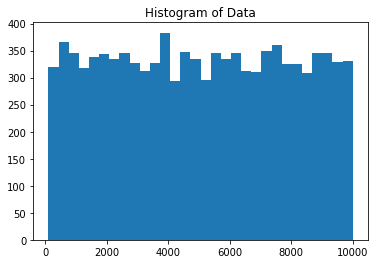

In [15]:
# Given the Customer Lifetime Value, Let's try bootstrapping
# Why should i do bootstrapping
# It is a statistical technique to understand the distribution of a statistic, by sampling the data with replacement
# It helps to estimate confidence interval around our statistic, when there is either not enough data or 
# the data is not normally distributed
# I want to check if the data is not normally distributed
import matplotlib.pyplot as plt

plt.hist(customer_data['Lifetime_Value'], bins=30)
plt.title('Histogram of Data')
plt.show()

In [16]:
# The data is not normally distributed
# How confident are we about the CLTV? Let's find out using Confidence Intervals
# I want to calculate the average CLTV and the confidence interval around the average CLTV
# Step 1: Calculate Average CLTV value
print("Average Customer Lifetime Value: %.2f" % customer_data["Lifetime_Value"].mean())

Average Customer Lifetime Value: 5031.93


In [51]:
#Bootstrapping

def bootstrap(data, num_samples=1000):
    """
    Performs bootstrapping to estimate the sampling distribution of the mean.

    Args:
        data: A list or numpy array of data values.
        num_samples: The number of bootstrap samples to generate.

    Returns:
        A list of the means calculated from each bootstrap sample.
    """
    n = len(data)
    means = []
    for sam in range(num_samples):
        sample = [random.choice(data) for sam in range(n)]
        # Calculate the mean of the sample
        means.append(np.mean(sample))
    return means

In [59]:
def confidence_interval(percent, statistic_list):
    ci_lower_percent = (100-percent)/2.0
    ci_higher_percent = percent + ci_lower_percent
    lower_bound = np.percentile(statistic_list, ci_lower_percent)
    upper_bound = np.percentile(statistic_list, ci_higher_percent)
    print(f"Estimated 95% confidence interval: [{lower_bound:.2f}, {upper_bound:.2f}]")
    return lower_bound, upper_bound

In [19]:
def draw_histogram(list_of_values, bins=30):
    plt.hist(list_of_values, bins=30)
    plt.title('Histogram of Data')
    plt.show()

In [27]:
bootstrap_means = bootstrap(customer_data["Lifetime_Value"], num_samples=100)

In [30]:
print(type(customer_data["Lifetime_Value"]))

<class 'pandas.core.series.Series'>


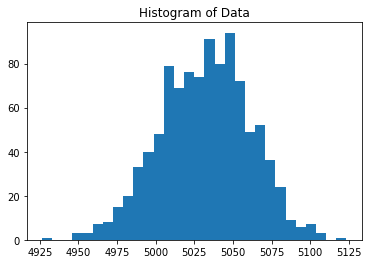

Estimated 95% confidence interval: [4973.69, 5084.19]


In [29]:
draw_histogram(bootstrap_means)
confidence_interval(95, bootstrap_means)

You might have 1,000 customers, and the average CLTV could be $1,200. But how certain are you 
that the true average CLTV for the entire population is really $1,200, and 
not something like $1,100 or $1,300? Bootstrapping allows you to simulate this process by resampling the data
and gives you a range of possible values, i.e., a confidence interval around that average.

In [21]:
# Currently we have estimated confidence intervals for the overall population. Now let's break down.
# Step 1: If we want to segment customer based on a criteria, we need to filter the unique customer rows
if len(customer_data) == len(customer_data["Customer_ID"].unique()):
    print("All Customers mentioned are unique")
else:
    #Steps to reduce the dataset to a customer level
    print("Needs work")

All Customers mentioned are unique


In [22]:
# Let's try CLTV values across these fields
# Retention_Strategy Churn_Probability Preferred_Purchase_Times Most_Frequent_Category Region
from pandas.api.types import is_float_dtype, is_integer_dtype

In [73]:
def mean_and_ci(data, field):
    original_mean = data[field].mean()
    print("Average %s: %.2f" % (field, original_mean))
    bootstrap_means = bootstrap(data[field].tolist(), num_samples=200)
    draw_histogram(bootstrap_means)
    ci_l, ci_h = confidence_interval(95, bootstrap_means)
    print("Width of CI relative to mean: %.2f" % ((ci_h-ci_l)/original_mean *100))
    print("-----------------------------------\n")

Category: Retention_Strategy Sub-Category: Loyalty Program 
Average Lifetime_Value: 5012.62


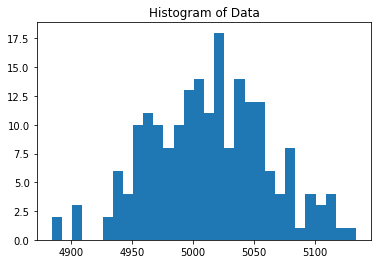

Estimated 95% confidence interval: [4929.48, 5109.87]
Width of CI relative to mean: 3.60
-----------------------------------

Category: Retention_Strategy Sub-Category: Discount 
Average Lifetime_Value: 5037.53


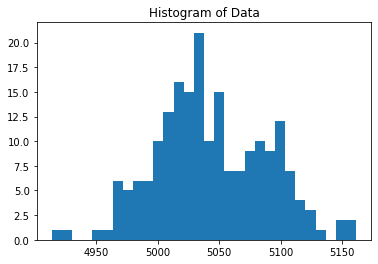

Estimated 95% confidence interval: [4966.56, 5126.77]
Width of CI relative to mean: 3.18
-----------------------------------

Category: Retention_Strategy Sub-Category: Email Campaign 
Average Lifetime_Value: 5045.81


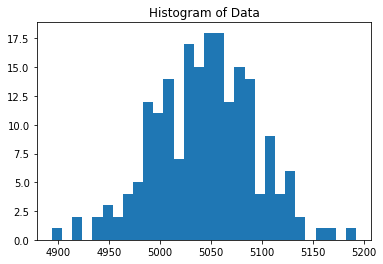

Estimated 95% confidence interval: [4949.45, 5129.45]
Width of CI relative to mean: 3.57
-----------------------------------

Category: Churn_Probability  in 0.00 to 0.25 range
Average Lifetime_Value: 5058.37


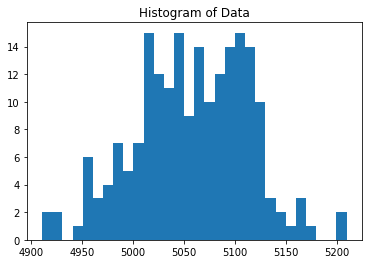

Estimated 95% confidence interval: [4953.33, 5160.24]
Width of CI relative to mean: 4.09
-----------------------------------

Category: Churn_Probability  in 0.25 to 0.50 range
Average Lifetime_Value: 5060.33


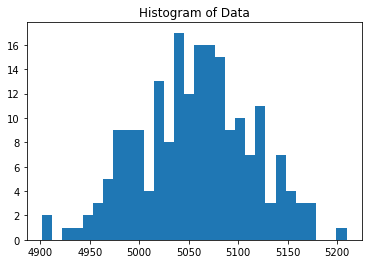

Estimated 95% confidence interval: [4948.68, 5161.69]
Width of CI relative to mean: 4.21
-----------------------------------

Category: Churn_Probability  in 0.50 to 0.75 range
Average Lifetime_Value: 5030.44


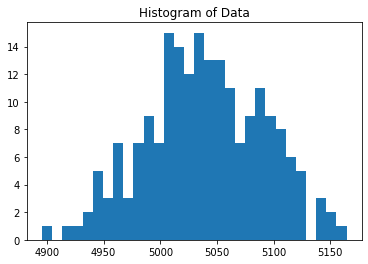

Estimated 95% confidence interval: [4941.72, 5138.95]
Width of CI relative to mean: 3.92
-----------------------------------

Category: Churn_Probability  in 0.75 to 1.00 range
Average Lifetime_Value: 4991.69


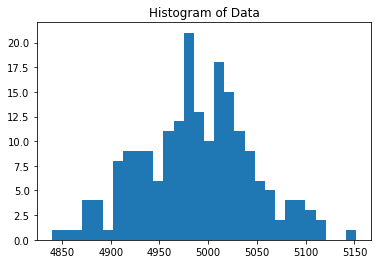

Estimated 95% confidence interval: [4874.44, 5101.67]
Width of CI relative to mean: 4.55
-----------------------------------

Category: Preferred_Purchase_Times Sub-Category: Afternoon 
Average Lifetime_Value: 4980.13


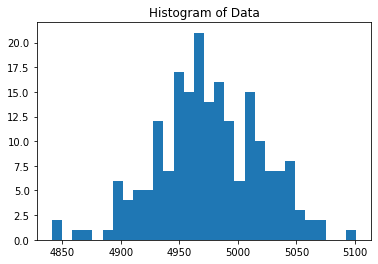

Estimated 95% confidence interval: [4895.62, 5057.76]
Width of CI relative to mean: 3.26
-----------------------------------

Category: Preferred_Purchase_Times Sub-Category: Evening 
Average Lifetime_Value: 5060.31


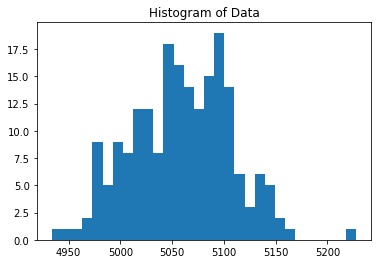

Estimated 95% confidence interval: [4974.36, 5148.34]
Width of CI relative to mean: 3.44
-----------------------------------

Category: Preferred_Purchase_Times Sub-Category: Morning 
Average Lifetime_Value: 5055.68


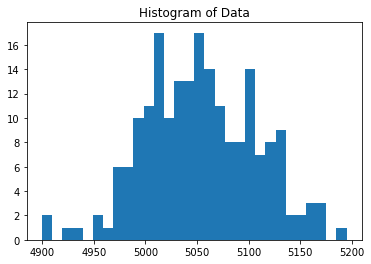

Estimated 95% confidence interval: [4954.67, 5159.98]
Width of CI relative to mean: 4.06
-----------------------------------

Category: Most_Frequent_Category Sub-Category: Electronics 
Average Lifetime_Value: 4973.47


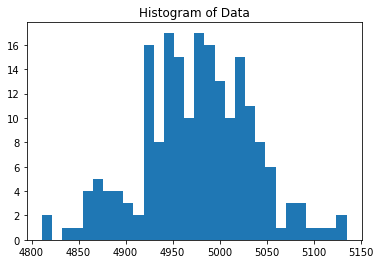

Estimated 95% confidence interval: [4861.59, 5087.19]
Width of CI relative to mean: 4.54
-----------------------------------

Category: Most_Frequent_Category Sub-Category: Clothing 
Average Lifetime_Value: 5047.70


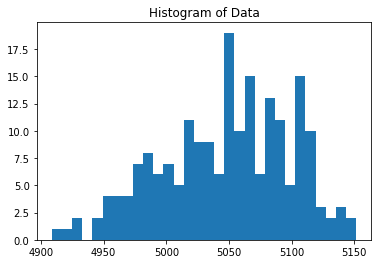

Estimated 95% confidence interval: [4945.80, 5132.80]
Width of CI relative to mean: 3.70
-----------------------------------

Category: Most_Frequent_Category Sub-Category: Sports 
Average Lifetime_Value: 5066.96


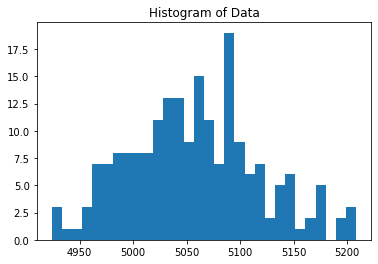

Estimated 95% confidence interval: [4952.93, 5180.26]
Width of CI relative to mean: 4.49
-----------------------------------

Category: Most_Frequent_Category Sub-Category: Home 
Average Lifetime_Value: 5041.93


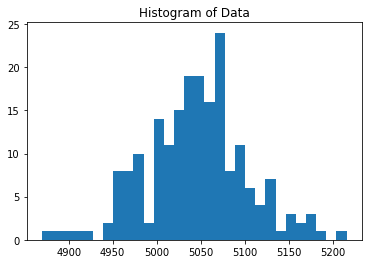

Estimated 95% confidence interval: [4941.71, 5159.23]
Width of CI relative to mean: 4.31
-----------------------------------

Category: Region Sub-Category: South America 
Average Lifetime_Value: 5014.93


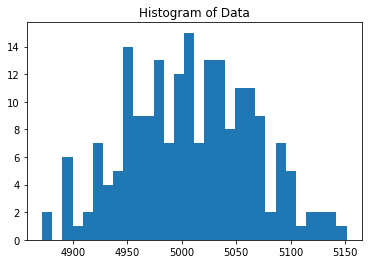

Estimated 95% confidence interval: [4895.45, 5118.01]
Width of CI relative to mean: 4.44
-----------------------------------

Category: Region Sub-Category: Asia 
Average Lifetime_Value: 5048.31


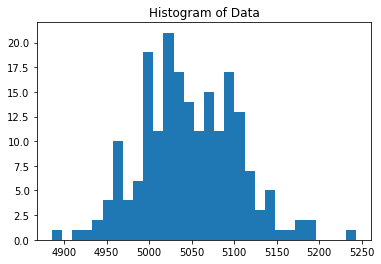

Estimated 95% confidence interval: [4945.37, 5165.19]
Width of CI relative to mean: 4.35
-----------------------------------

Category: Region Sub-Category: North America 
Average Lifetime_Value: 5073.58


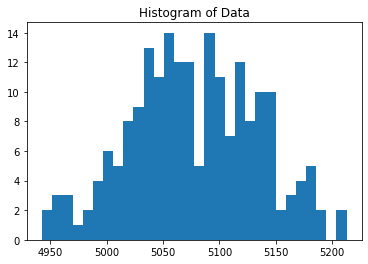

Estimated 95% confidence interval: [4963.71, 5185.40]
Width of CI relative to mean: 4.37
-----------------------------------

Category: Region Sub-Category: Europe 
Average Lifetime_Value: 4992.77


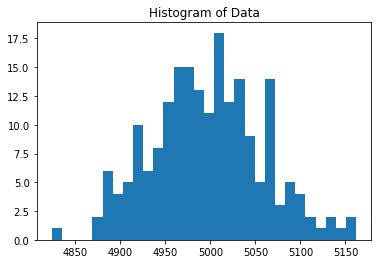

Estimated 95% confidence interval: [4887.67, 5118.89]
Width of CI relative to mean: 4.63
-----------------------------------



In [74]:
customer_segmentation_cols = ["Retention_Strategy", "Churn_Probability", "Preferred_Purchase_Times", "Most_Frequent_Category", "Region"]
for col in customer_segmentation_cols:
    if not (is_float_dtype(customer_data[col]) or is_integer_dtype(customer_data[col])):
        unique_values = customer_data[col].unique()
        for category in unique_values:
            subset_data = customer_data.loc[customer_data[col] == category]
            print("Category: %s Sub-Category: %s " % (col, category))
            mean_and_ci(subset_data, "Lifetime_Value")
    else:
        #For numeric columns, we create n bins and separate rows into n bins and explore CLTV
        #For example, we choose 4
        max_val = max(customer_data[col])
        min_val = min(customer_data[col])
        width = max_val - min_val       
        for i in range(n):
            start = min_val+(i*width/n)
            end = start+(width/n)
            subset_data = customer_data.loc[customer_data[col].between(start, end)]
            print("Category: %s  in %.2f to %.2f range" % (col, start, end))
            mean_and_ci(subset_data, "Lifetime_Value")
